In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)


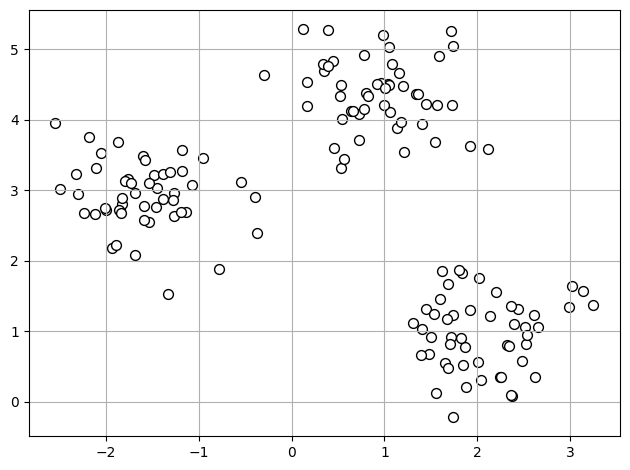

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            s=50,
            c= 'white',
            marker='o',
            edgecolor='black')
plt.grid()
plt.tight_layout()

задача алгоритма: минимизация внутрикластерной SSE - суммы квадратичных ошибок

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,#10 раз выполняем алгоритм с случайными центроидами и выбираем тот в котором меньше SSE
            max_iter=300,#если алгоритм не сойдется то 300 раз будем пересчитывать
            tol=1e-04,#управляет порогом изменений во внутрикластерной SSE для объявления сходимости
            random_state=0)
y_km = km.fit_predict(X)

проблема KMeans в том, что кластеры могут быть пустыми(пофиксили), такой проблемы нет в K-Medoids и FCM;
необходимо стандартизировать признаки

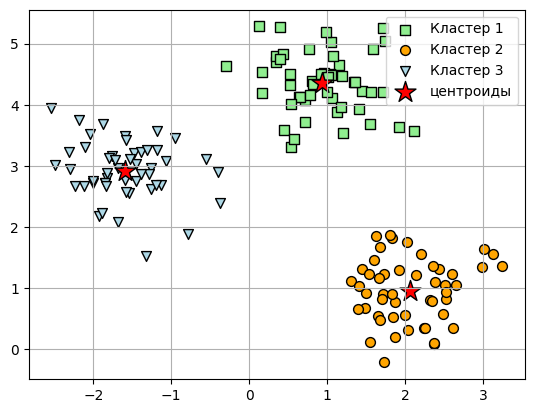

In [7]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c = 'lightgreen',
            marker='s', edgecolor='black',
            label = 'Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c = 'orange',
            marker='o', edgecolor='black',
            label = 'Кластер 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c = 'lightblue',
            marker='v', edgecolor='black',
            label = 'Кластер 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='центроиды')
plt.legend(scatterpoints=1)
plt.grid()


необходимо зранее указывать количество кластеров
K-means++ - лучше выбирает начальные центры кластеров (выбирает их далеко друг от друга - лучше) init = 'k-means++' - в K-Means

мягкая кластеризация - 1 объект может принадлежать нескольким кластерам (FCM - вероятность принадлежности к кластеру)![Alt text](image.png)

![Alt text](image-1.png)

Text(0, 0.5, 'Искажение')

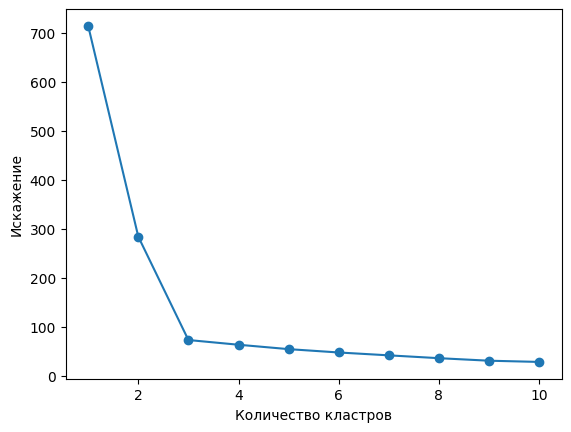

In [8]:
#метод локтя
distortions = []
for i in range (1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Количество кластров')
plt.ylabel('Искажение')


Text(0.5, 0, 'Коэф. силуэта')

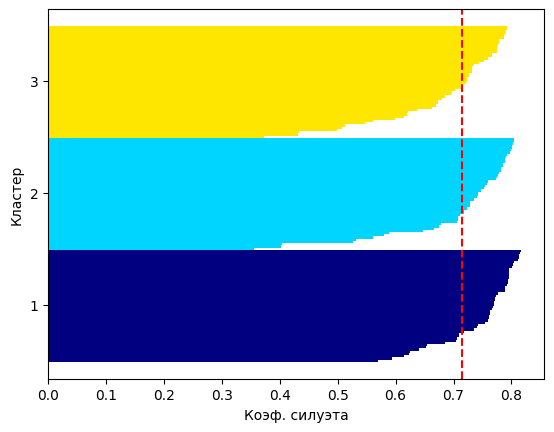

In [11]:
#анализ силуэтов
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0,
            tol=1e-04)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower+=len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэф. силуэта')


кластеры найдены корректно


Text(0.5, 0, 'Коэф. силуэта')

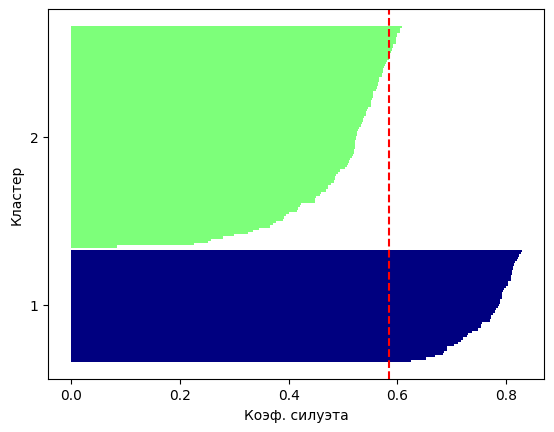

In [12]:
#анализ силуэтов
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0,
            tol=1e-04)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower+=len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэф. силуэта')


кластеры найдены не корректно (субоптимально)

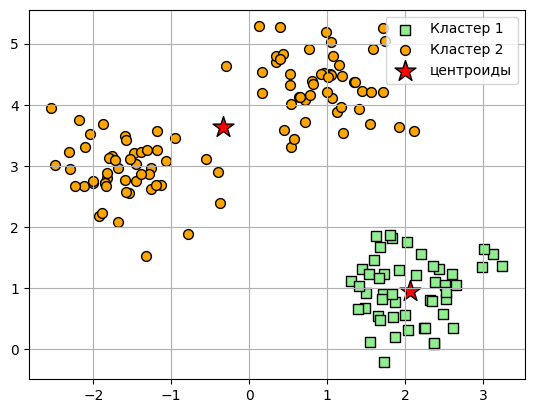

In [13]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c = 'lightgreen',
            marker='s', edgecolor='black',
            label = 'Кластер 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c = 'orange',
            marker='o', edgecolor='black',
            label = 'Кластер 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='центроиды')
plt.legend(scatterpoints=1)
plt.grid()

![Alt text](image-2.png)

In [14]:
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [15]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [16]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [17]:
row_cluster = linkage(df.values,
                      method='complete',
                      metric='euclidean')
pd.DataFrame(row_cluster,
             columns=['Метка строки 1',
                      'Метка строки 2',
                      'Расстояние',
                      'Кол-во элементов в кластере'],
                      index=['Кластер %d' % (i + 1) for i in
                             range(row_cluster.shape[0])])

,Метка строки 1,Метка строки 2,Расстояние,Кол-во элементов в кластере
Кластер 1,0.0,4.0,3.835396,2.0
Кластер 2,1.0,2.0,4.347073,2.0
Кластер 3,3.0,5.0,5.899885,3.0
Кластер 4,6.0,7.0,8.316594,5.0


Text(0, 0.5, 'Евклидово расстояние')

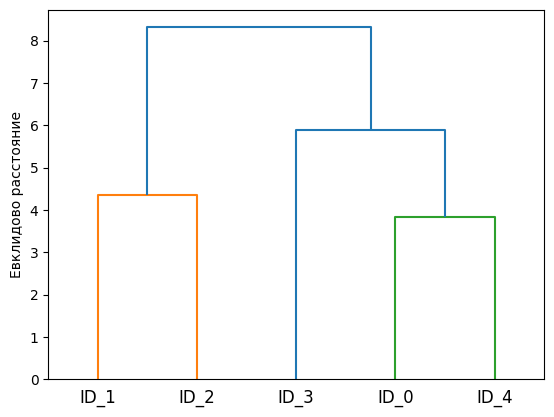

In [19]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_cluster,
                       labels=labels)
plt.ylabel('Евклидово расстояние')

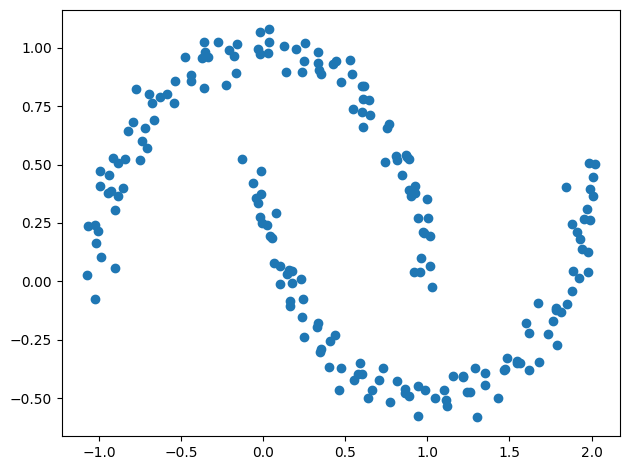

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()

In [24]:
from sklearn.cluster import AgglomerativeClustering

c:\Users\VIKTOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VIKTOR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


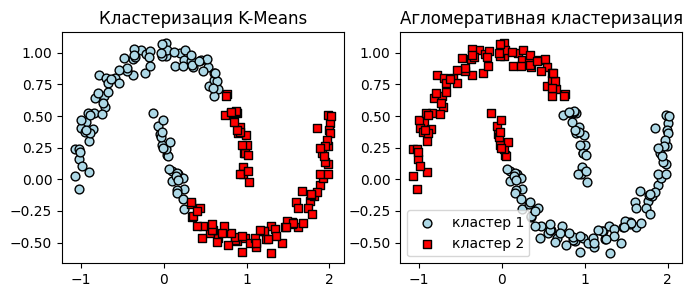

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'кластер 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'кластер 2')
ax1.set_title('Кластеризация K-Means')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'кластер 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'кластер 2')
ax2.set_title('Агломеративная кластеризация')
plt.legend()


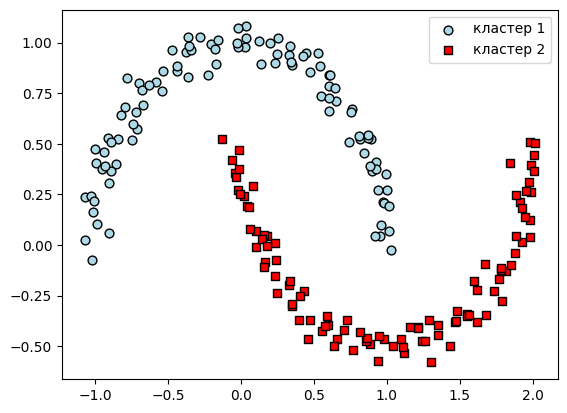

In [27]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,#радиус
            min_samples=5,#критерий ядерной точки
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'кластер 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'кластер 2')
plt.legend()

кластеризация на основе плотности![Alt text](image-3.png)

подвержен проклятию размерности особенно для евклидового расстояния, гиперпараметры eps и minpts нуждаются в настройке, их сложно найти если большие разницы плотностей